## IIB40303 - PROGRAMMING FOR DATA ANALYTIC

### DATASET: OBESITY ESTIMATION
#### NURUL HAZIQAH BINTI HAMZAN (52224121149)
#### SOFEA HANIM BINTI SHAROL HISAM (52224121151)

#### Importing Needed Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#### Data Loading and Configuration

In [14]:
pd.set_option('display.max_column', None)

In [15]:
pd.set_option('display.max_row', None)

In [16]:
df = pd.read_csv("C:\\Users\\ajwdh\\Downloads\\estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.csv")

#### Data Preparation

In [17]:
df.describe()

,Id,Height,Weight,family_history_with_overweight,SCC,MTRANS_Walking,FAVC_z,FCVC_minmax,NCP_z,CAEC_minmax,CH2O_minmax,FAF_minmax,TUE_z,CALC_z,Age_bin_minmax,NObeyesdad,BMI
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,1043.500000,1.702045,86.622985,0.817354,0.045062,0.026366,0.639326,0.709818,0.763670,0.379834,0.504361,0.337873,0.843202,0.855417,0.499760,3.110259,29.700016
std,602.320651,0.093419,26.256245,0.386469,0.207491,0.160260,0.769120,0.267493,0.645761,0.155956,0.306578,0.283687,0.537726,0.518064,0.353723,1.993832,8.041437
min,1.000000,1.450000,39.000000,0.000000,0.000000,0.000000,0.361418,0.000000,0.002375,0.000000,0.000000,0.000000,0.000146,0.516552,0.000000,0.000000,12.998685
25%,522.250000,1.630000,65.130595,1.000000,0.000000,0.000000,0.361418,0.500000,0.404704,0.333333,0.291005,0.042901,0.466622,0.516552,0.250000,1.000000,24.280975
50%,1043.500000,1.701383,83.000000,1.000000,0.000000,0.000000,0.361418,0.695087,0.404704,0.333333,0.500000,0.333333,0.813973,0.516552,0.500000,3.000000,28.699882
75%,1564.750000,1.768770,108.009452,1.000000,0.000000,0.000000,0.361418,1.000000,1.031717,0.333333,0.740243,0.557356,1.092724,1.439033,0.750000,5.000000,36.089057
max,2086.000000,1.980000,165.057269,1.000000,1.000000,1.000000,2.766876,1.000000,2.164116,1.000000,1.000000,1.000000,2.194694,4.427721,1.000000,6.000000,50.811753


In [18]:
df.isnull().sum()

Id                                0
Height                            0
Weight                            0
family_history_with_overweight    0
SCC                               0
MTRANS_Walking                    0
FAVC_z                            0
FCVC_minmax                       0
NCP_z                             0
CAEC_minmax                       0
CH2O_minmax                       0
FAF_minmax                        0
TUE_z                             0
CALC_z                            0
Age_bin_minmax                    0
NObeyesdad                        0
BMI                               0
dtype: int64

#### Data Cleaning

In [19]:
df.duplicated().sum()

0

In [21]:
categorical_cols = ['family_history_with_overweight', 'SCC', 'MTRANS_Walking']

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [22]:
scaler = StandardScaler()
df[['Height', 'Weight', 'BMI']] = scaler.fit_transform(df[['Height', 'Weight', 'BMI']])

#### Exploratory Data Analysis

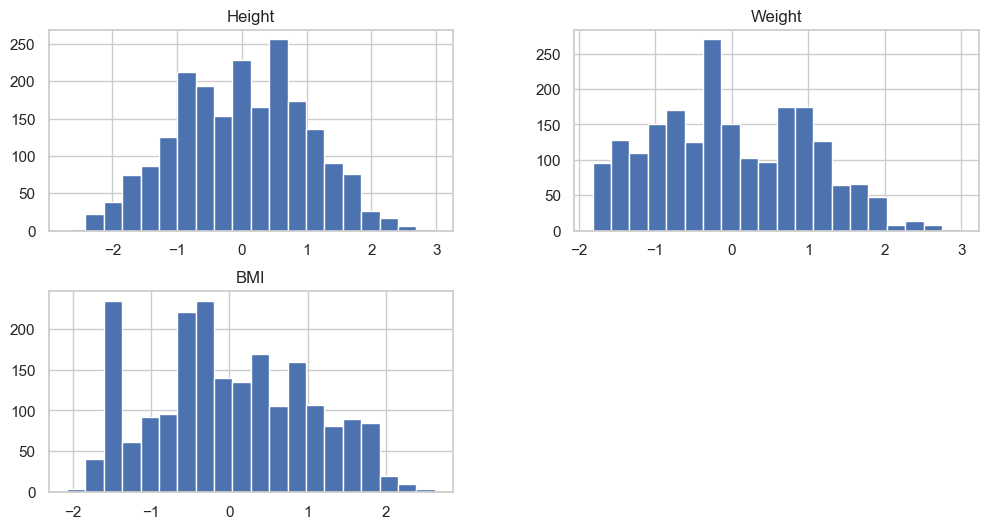

In [23]:
df[['Height', 'Weight', 'BMI']].hist(bins=20, figsize=(12, 6))
plt.show()

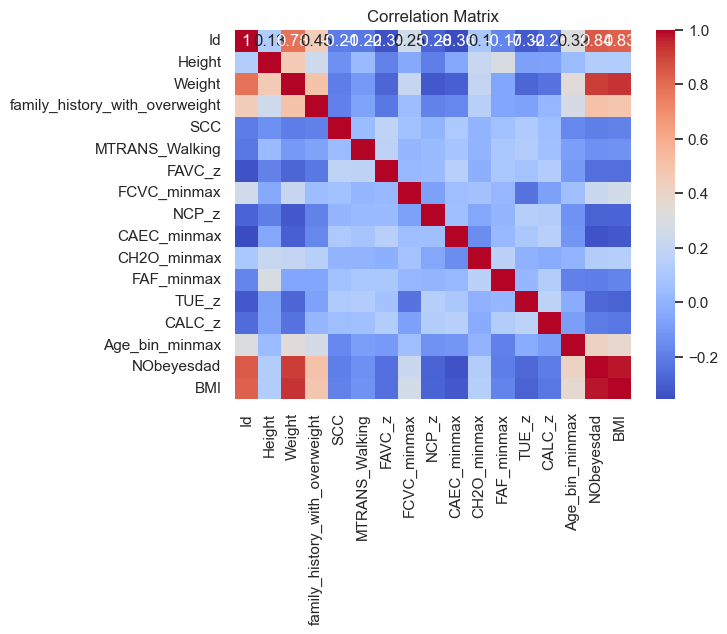

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

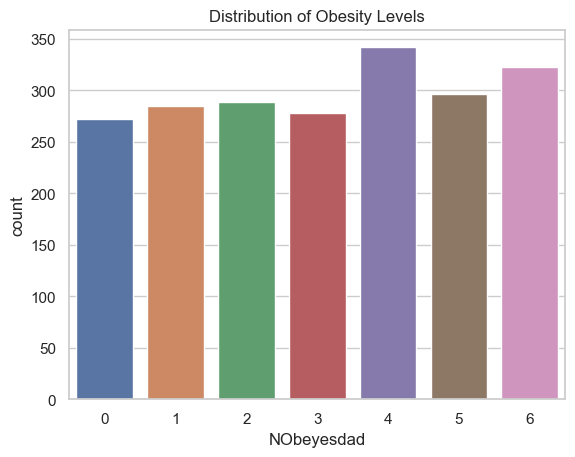

In [25]:
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribution of Obesity Levels')
plt.show()

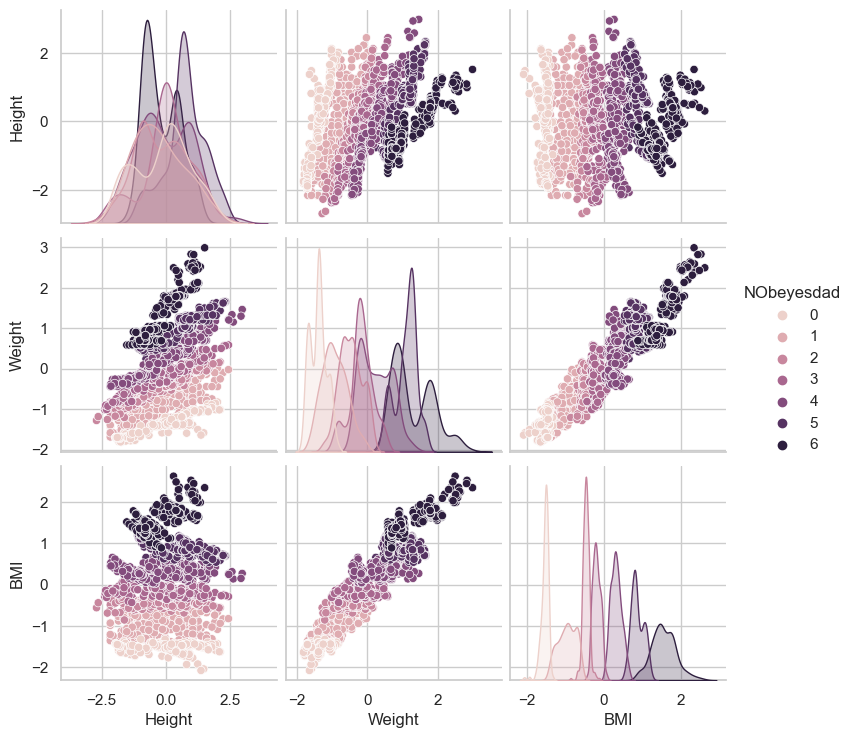

In [26]:
sns.pairplot(df, vars=['Height', 'Weight', 'BMI'], hue='NObeyesdad')
plt.show()

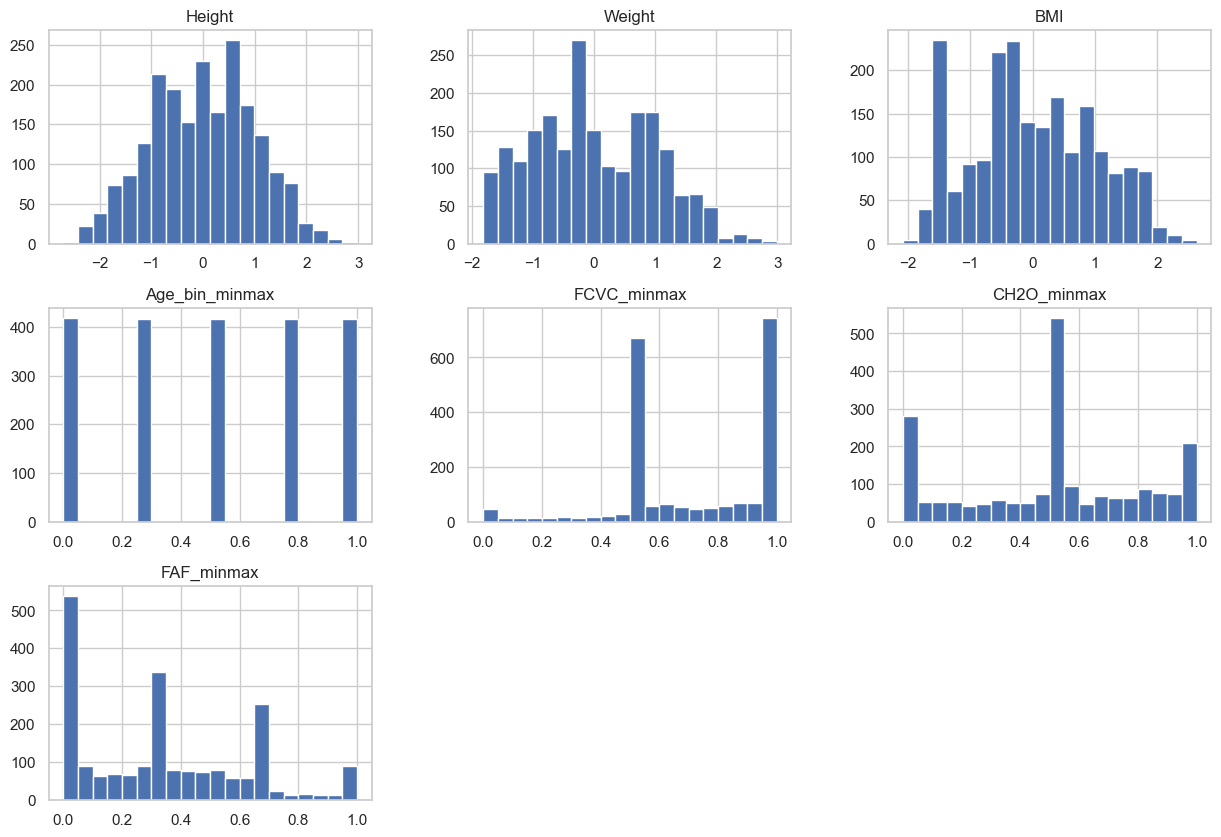

In [27]:
numerical_features = ['Height', 'Weight', 'BMI', 'Age_bin_minmax', 'FCVC_minmax', 'CH2O_minmax', 'FAF_minmax']

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

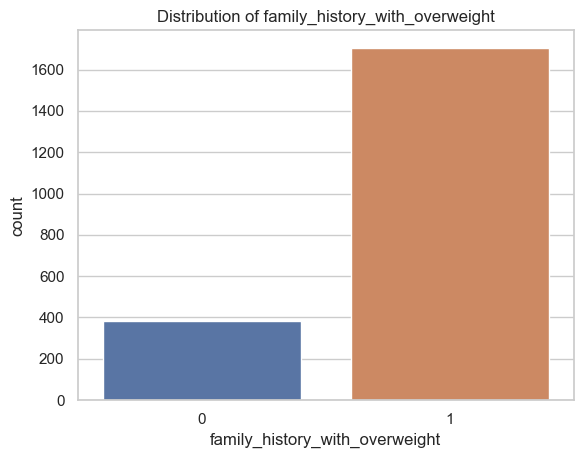

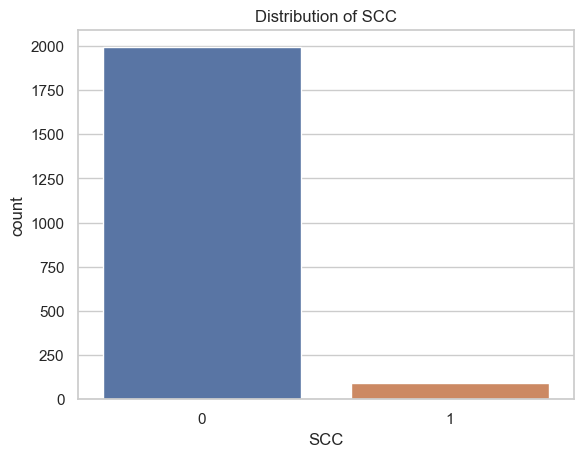

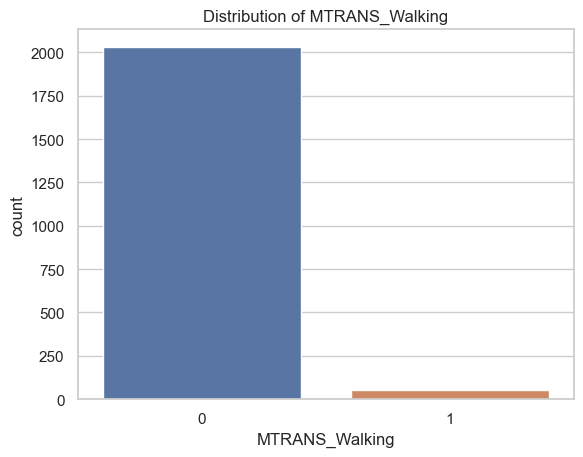

In [28]:
categorical_features = ['family_history_with_overweight', 'SCC', 'MTRANS_Walking']

for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

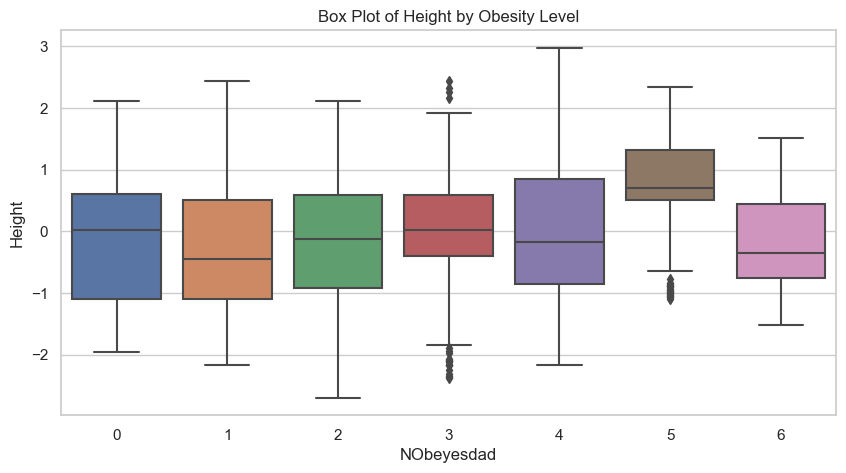

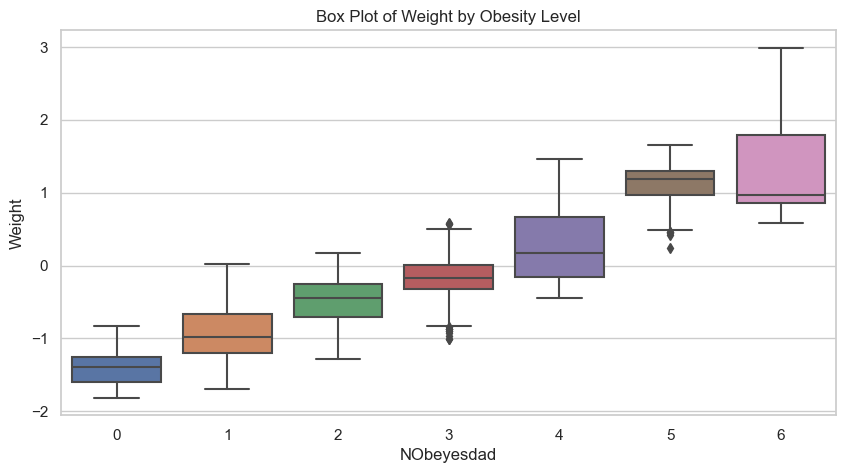

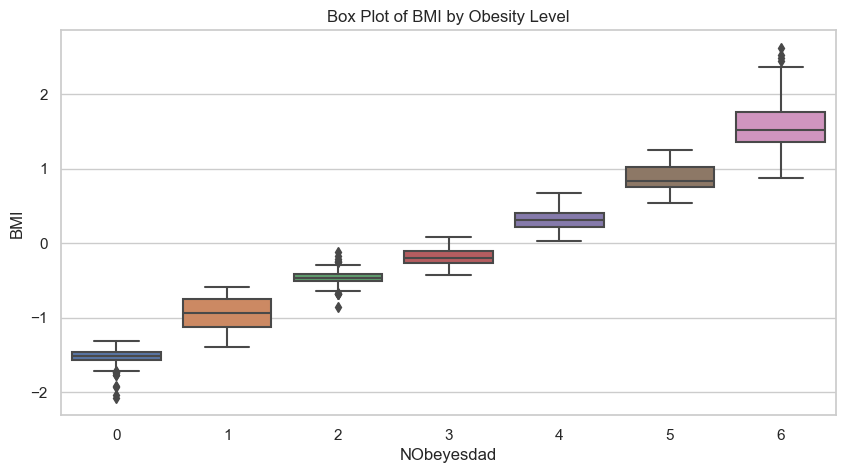

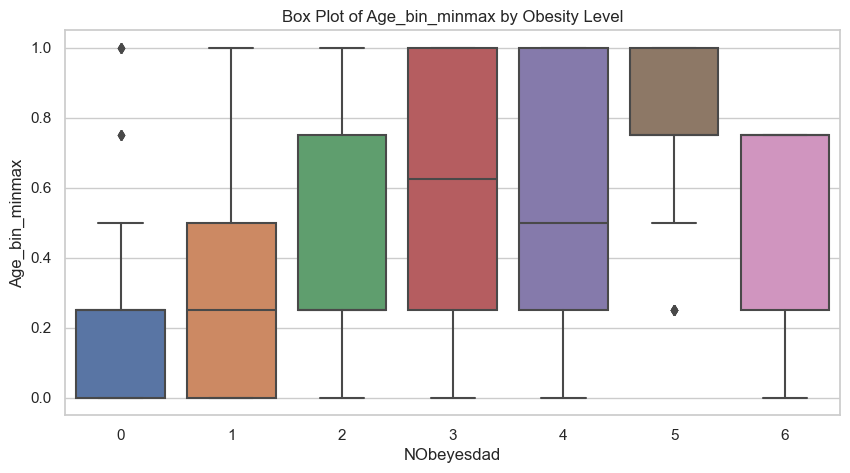

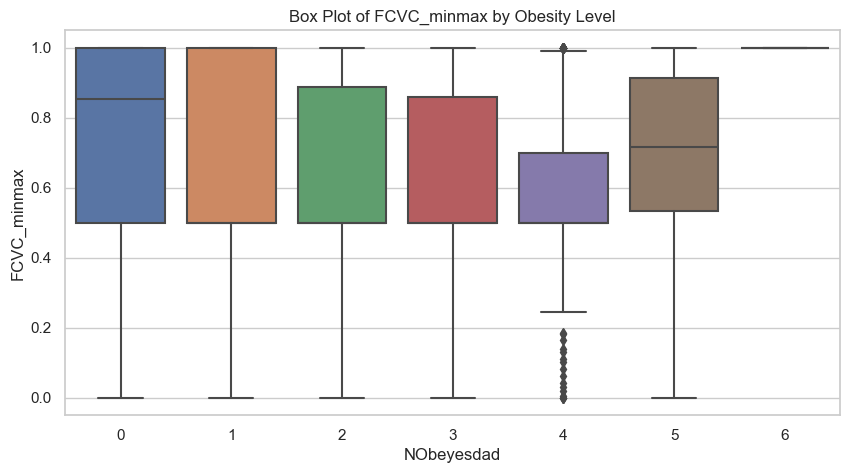

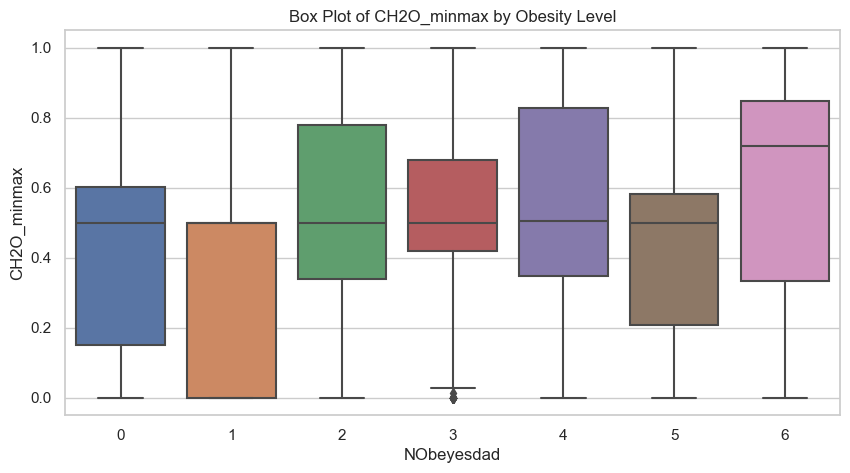

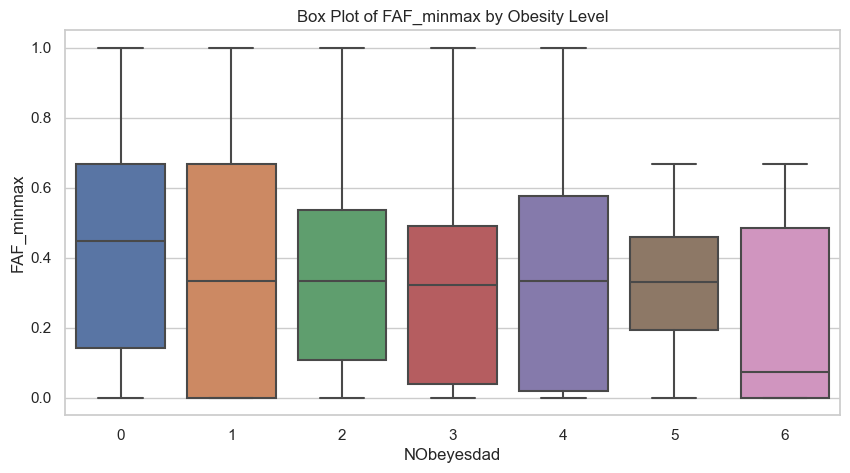

In [29]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='NObeyesdad', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Obesity Level')
    plt.show()

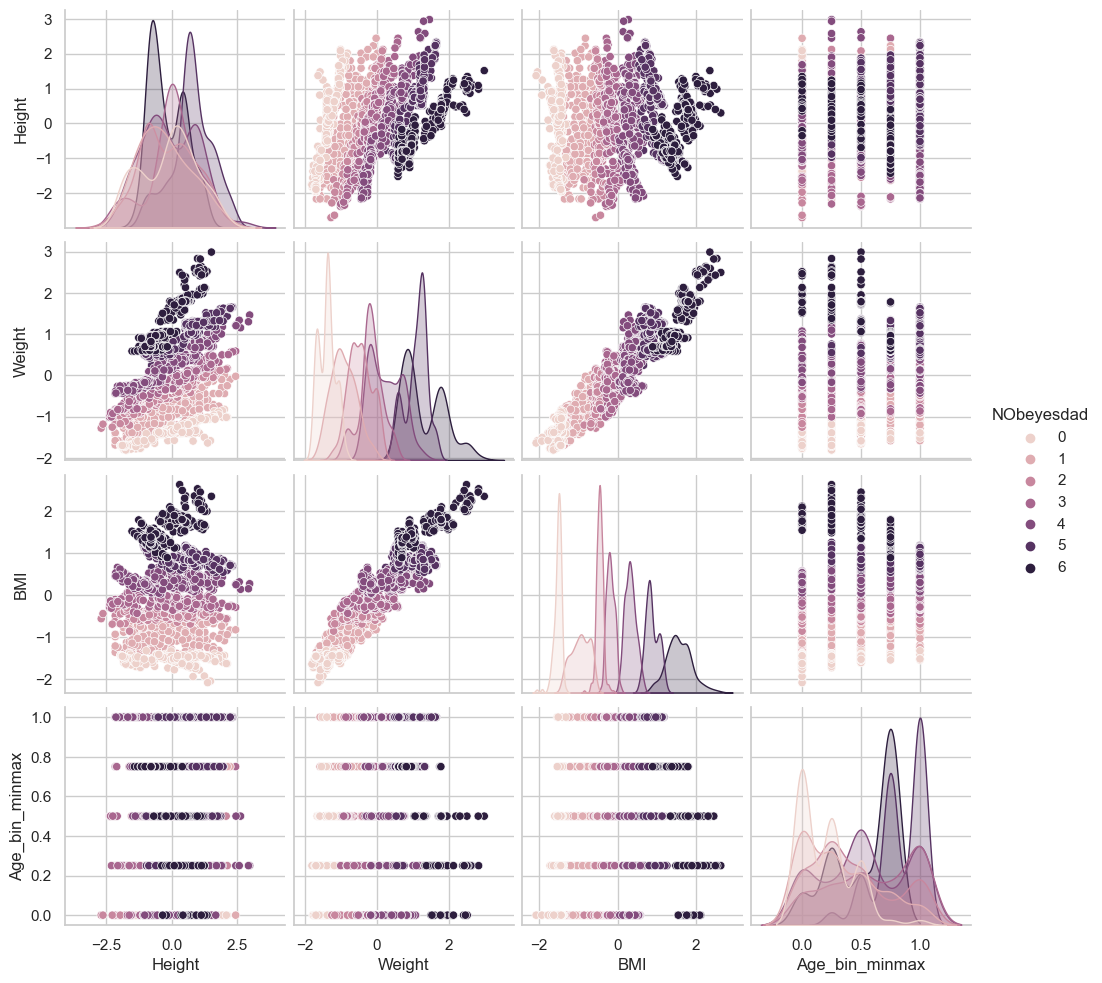

In [30]:
sns.pairplot(df, vars=['Height', 'Weight', 'BMI', 'Age_bin_minmax'], hue='NObeyesdad')
plt.show()

#### Findings

1. This dataset contains information about height, weight, BMI and various features that related to eating habits and physical activity. This data is also contain no missing values and repeated values, so there is no follow up coding needed to clean this dataset.
2. The correlation matrix reveals that the relationship between BMI and weight is highly correlated.
3. The distribution plot shows the data is spread accross different levels of obesity.
4. The pairplot visualizes the relationship between height, weight, BMI and obesity levels.

#### Thank you for watching <3